In [117]:
import pandas as pd
import glob
import re

pd.options.mode.chained_assignment = None

date_rng = pd.date_range(start='1/1/1967', end='16/06/2022', freq='D')
daily_prices = pd.DataFrame(date_rng, columns = ['Date'])

for file in glob.glob('../data/*.csv'):
    filename_match = re.search('[\w-]+?(?=\.)', file)
    
    df = pd.read_csv(file, parse_dates=['Date'], infer_datetime_format=True, usecols = ['Date','Close'])
    df = df.rename(columns = {'Close':filename_match.group()})
    
    daily_prices = pd.merge_asof(daily_prices, df, on='Date', tolerance=pd.Timedelta('1d'))

daily_prices.set_index(daily_prices['Date'], inplace=True)
del daily_prices['Date']

/home/argiris/miniconda3/envs/portfolio/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: UserWarning: Parsing '16/06/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [138]:
study_period = daily_prices.loc['2020-01-01':'2022-06-16']

In [139]:
for fund in study_period.columns:
    if fund == 'Date': continue
    initial_value = study_period[fund].iloc[0]
    if pd.isna(initial_value) == False:
        study_period.loc[:, [fund]] = study_period[fund] / initial_value
        study_period.loc[:, [fund]] = study_period[fund] - 1
        study_period.loc[:, [fund]] = study_period[fund] * 100
    else:
        del study_period[fund]
    
study_period

,ArtemisGlobalIncome,BGAmerican,BGGlobalAlpha,BGPositiveChange,BHMG,CTY,FidelityGlobalDividend,GRID,LFLindsellTrainUKEquity,MNKS,MYI,RICA,SMT
Date,,,,,,,,,,,,,
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-02,0.825078,0.821193,0.586516,0.842988,0.000000,1.127396,0.430420,0.930233,0.430152,1.147028,0.000000,-1.333333,1.208981
2020-01-03,1.061842,1.422629,0.814598,0.895678,0.383142,0.901917,0.143481,0.930233,-0.576316,1.042753,0.000000,-1.111111,1.295337
2020-01-04,1.061842,1.422629,0.814598,0.895678,0.383142,0.901917,0.143481,0.930233,-0.576316,1.042753,0.000000,-1.111111,1.295337
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-13,22.420720,7.460097,5.897689,40.147521,72.413793,-9.131905,4.734581,46.046512,-7.801208,-5.213764,-0.952381,40.888889,20.172709
2022-06-14,21.581289,3.007171,4.692080,37.565860,70.881226,-8.793687,4.878051,46.279070,-8.504903,-5.318040,-1.111111,41.111111,19.481863


<IPython.core.display.Javascript object>


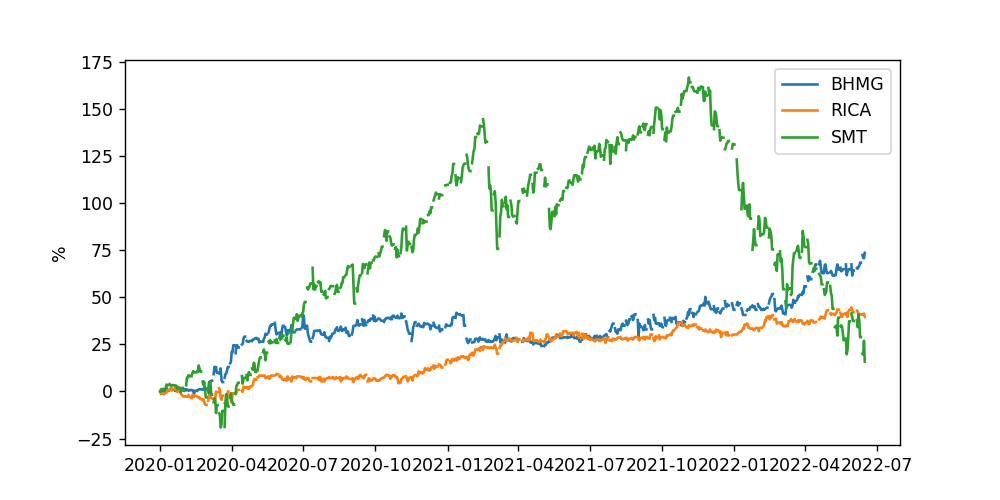

In [141]:
import matplotlib.pyplot as plt
%matplotlib notebook

funds = ['BHMG', 'RICA', 'SMT']
#funds = study_period.columns

plt.figure(figsize=(8,4))

for fund in funds:
    plt.plot(study_period.index, study_period[fund])
    
plt.ylabel('%')

plt.legend(funds)
plt.show()